## CAPM Simulation_South Africa

In [1]:
## To evaluate the samll sample properties of the IV method, a battery of simulations are conducted using the parameters
## matched to real data.

In [1]:
import pandas as pd
import json
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
from tqdm import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.gmm import IV2SLS
import linearmodels

In [2]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [3]:
df_MR = pd.read_csv('df_MR.csv')

In [4]:
df_MR.Dates = df_MR.Dates.apply(lambda x:x[:10])

In [5]:
df_MR.set_index('Dates',inplace=True)

In [6]:
df_RF = pd.read_csv('df_RF.csv',index_col=0)
df_SR = pd.read_csv('df_SR.csv',index_col=0)
df_SR.index = df_SR.index.to_series().apply(lambda x:x[:10])

In [7]:
df_SR

,FDS.SJ.Equity,MOZ.SJ.Equity,MTN.SJ.Equity,TRT.SJ.Equity,AEG.SJ.Equity,ECO.SJ.Equity,NTC.SJ.Equity,SFT.SJ.Equity,WHL.SJ.Equity,SOL.SJ.Equity,...,REB.SJ.Equity,EQU.SJ.Equity,CLI.SJ.Equity,MCG.SJ.Equity,DGH.SJ.Equity,MTH.SJ.Equity,DIA.SJ.Equity,CTK.SJ.Equity,SSS.SJ.Equity,AFT.SJ.Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-05,-0.020399,-0.015268,0.012821,-0.037740,-0.020076,0.003743,-0.024693,-0.046422,-0.040734,-0.009132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,-0.015597,-0.039222,0.075623,0.000000,0.000000,0.011146,-0.077962,-0.006501,-0.047886,0.015175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,0.005226,0.017448,0.079437,0.037740,0.000000,0.021925,0.013423,0.052922,0.034816,0.041304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,0.040828,0.053572,0.066809,0.000000,0.026680,-0.036814,0.089231,0.116637,0.076001,0.020973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,0.078810,0.029372,0.020203,0.014706,0.013078,0.006231,0.070618,0.044851,-0.050029,-0.044366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-12-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-12-27,0.000000,0.000000,-0.000119,0.000000,0.000000,0.000000,0.004612,0.000000,0.003673,0.012542,...,-0.062520,0.007632,-0.003382,-0.009192,0.003046,0.019091,0.016129,-0.002897,0.024015,0.010598


In [8]:
df_Ex_SR = df_SR-df_RF.values

In [9]:
df_Ex_SR

,FDS.SJ.Equity,MOZ.SJ.Equity,MTN.SJ.Equity,TRT.SJ.Equity,AEG.SJ.Equity,ECO.SJ.Equity,NTC.SJ.Equity,SFT.SJ.Equity,WHL.SJ.Equity,SOL.SJ.Equity,...,REB.SJ.Equity,EQU.SJ.Equity,CLI.SJ.Equity,MCG.SJ.Equity,DGH.SJ.Equity,MTH.SJ.Equity,DIA.SJ.Equity,CTK.SJ.Equity,SSS.SJ.Equity,AFT.SJ.Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-05,-0.020678,-0.015547,0.012542,-0.038019,-0.020355,0.003464,-0.024971,-0.046701,-0.041012,-0.009411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,-0.015876,-0.039501,0.075345,-0.000279,-0.000279,0.010867,-0.078240,-0.006779,-0.048165,0.014896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,0.004951,0.017172,0.079162,0.037465,-0.000275,0.021650,0.013148,0.052647,0.034541,0.041029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,0.040553,0.053297,0.066534,-0.000275,0.026405,-0.037089,0.088956,0.116362,0.075726,0.020698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,0.078535,0.029097,0.019928,0.014431,0.012802,0.005955,0.070342,0.044575,-0.050305,-0.044641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,...,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190
2019-12-26,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,...,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190
2019-12-27,-0.000189,-0.000189,-0.000308,-0.000189,-0.000189,-0.000189,0.004422,-0.000189,0.003483,0.012353,...,-0.062710,0.007442,-0.003571,-0.009381,0.002857,0.018901,0.015940,-0.003086,0.023825,0.010409


In [9]:
df_Ex_SR = df_Ex_SR.loc[df_MR.index,:]

In [10]:
ols_model = LinearRegression()

In [11]:
## For each stock, we fit market model regressions to esimate constant betas and residual return standard deviation;
## Then we match the simulation paramters (mean&std_dev) to the distribution of these parametes in the real data.

In [12]:
## Constant beta estimations without rolling windows
all_betas = []
all_sigmas = []

betas = []
sigmas = []
labels = []
# j is cross-sectional stock name
for j in tqdm(df_Ex_SR.columns):
    df_index = df_Ex_SR.loc[:,j].dropna().index

    if len(df_index) != 0:
#         lag = int(4*((len(df_Ex_SR.loc[df_index,j]))/100)**(1/9))
        ols = sm.OLS(df_Ex_SR.loc[df_index,j].values.astype(np.float64), df_MR.loc[df_index,:].values.astype(np.float64))
#         res = ols.fit(cov_type='HAC',cov_kwds={'maxlags':lag})
        res = ols.fit()
        b = list(res.params)
        s = np.std(res.resid)
        betas.append(b)
        sigmas.append(s)
        labels.append(j)

all_betas.append(pd.DataFrame(betas))
all_sigmas.append(pd.DataFrame(sigmas))


100%|██████████| 245/245 [00:00<00:00, 328.94it/s]


In [14]:
df_betas = pd.concat([all_betas[0], pd.DataFrame(labels)], axis = 1)
df_betas.columns = ['MKT','Stocks']
df_betas = df_betas.set_index('Stocks')
df_betas = df_betas[(np.abs((df_betas-df_betas.mean())/df_betas.std()) <= 3).all(axis=1)]
df_betas

,MKT
Stocks,
FDS.SJ.Equity,0.097357
MOZ.SJ.Equity,0.144294
MTN.SJ.Equity,1.040482
TRT.SJ.Equity,0.127970
AEG.SJ.Equity,0.653292
...,...
MTH.SJ.Equity,0.979856
DIA.SJ.Equity,0.164211
CTK.SJ.Equity,0.141280


In [15]:
## The following is residual return standard deviations
df_sigmas = pd.concat([all_sigmas[0], pd.DataFrame(labels)], axis = 1)
df_sigmas.columns = ['sigmas','Stocks']
df_sigmas = df_sigmas.set_index('Stocks')
df_sigmas = df_sigmas[(np.abs((df_sigmas-df_sigmas.mean())/df_sigmas.std()) <= 3).all(axis=1)]
df_sigmas

,sigmas
Stocks,
FDS.SJ.Equity,0.025992
MOZ.SJ.Equity,0.017331
MTN.SJ.Equity,0.020729
TRT.SJ.Equity,0.018354
AEG.SJ.Equity,0.064235
...,...
MTH.SJ.Equity,0.020234
DIA.SJ.Equity,0.030624
CTK.SJ.Equity,0.023544


In [15]:
## We conduct simulations with the cross-sectional size of N=819 stocks. We randomly generat daily returns using the following procedures:
## Step-1: For each stock, we randomly generate a beta and a standard deviations of return residuals from normal distributions.

In [17]:
## ** the mean and standard deviation of simulated beta/residuals the same as the real betas'/residuals' 
m_all_betas = np.mean(df_betas.iloc[:,0])
sd_all_betas = np.std(df_betas.iloc[:,0])
print(m_all_betas, sd_all_betas)

0.29619962996768606 0.23725148653247286


In [18]:
## ** the mean and standard deviation of simulated beta/residuals the same as the real betas'/residuals' 
m_all_sigmas = np.mean(df_sigmas.iloc[:,0].astype('float64'))
sd_all_sigmas = np.std(df_sigmas.iloc[:,0].astype('float64'))
print(m_all_sigmas, sd_all_sigmas)

0.02406615373497262 0.014432282874836097


In [19]:
m_all_sigmas*252

6.0646707412131

In [20]:
sd_all_sigmas*np.sqrt(252)

0.22910538802651587

## beta,i and res_sigma,i are fixed through 100 repetitions

In [18]:
# How many stocks in the simulation sample on cross-sectional scale
N = 500

In [19]:
sim_betas_tmp = []
sim_betas_tmp.append(np.random.normal(loc = m_all_betas,scale = sd_all_betas, size= N ))
np.mean(sim_betas_tmp), np.std(sim_betas_tmp)

(0.15903874992143782, 0.19998046450403706)

In [20]:
sim_betas = pd.DataFrame(sim_betas_tmp)
sim_betas

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-0.030743,0.173686,0.398619,0.13742,-0.098437,0.47437,0.424132,0.371024,0.181027,-0.040989,...,0.280916,-0.206993,0.07387,0.389672,0.115551,0.324832,0.381322,0.567275,-0.171596,0.280696


In [21]:
sim_sigmas_tmp = []
sim_sigmas_tmp.append(np.random.normal(loc = m_all_sigmas,scale = sd_all_sigmas, size= N ))
np.mean(sim_sigmas_tmp), np.std(sim_sigmas_tmp)

(0.0160194600487634, 0.013628514489629033)

In [22]:
sim_sig_res = pd.DataFrame(sim_sigmas_tmp).abs()
sim_sig_res

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.016726,0.01883,0.041472,0.014804,0.01389,0.018484,0.016723,0.033338,0.019043,0.04813,...,0.006268,0.016348,0.007004,0.023742,0.003574,0.032978,0.023456,0.006987,0.002734,0.016656


In [23]:
## Step-2: For each day, we randomly draw market excess return from a normal distribution with mean and standard deviation
## equal to the sample mean and standard deviation from the data

## sim_MKT, sim_SR and res_return are changable through 100 repetitions

In [24]:
mean_MKT = np.mean(df_MR.iloc[:,0])
sd_MKT = np.std(df_MR.iloc[:,0])
print(mean_MKT, sd_MKT)

0.0002807670182166827 0.011549088535812713


In [25]:
## It's important to make sure that np.mean(sim_MKT_tmp) is precisely equal to mean_MKT, otherwise the gap between 
## ex-ante and ex-post biases will be significant

In [26]:
sim_MKT_tmp = []
sim_MKT_tmp.append(np.random.normal(loc = mean_MKT,scale = sd_MKT, size= len(df_MR)))
print(np.mean(sim_MKT_tmp), np.std(sim_MKT_tmp))

0.0002394994784453351 0.0114760915890577


In [27]:
sim_MKT = pd.DataFrame(sim_MKT_tmp).T
sim_MKT.index = df_MR.index
sim_MKT.columns = ['RM-RF']
sim_MKT

,RM-RF
Dates,
2000-01-05,0.021861
2000-01-06,0.010855
2000-01-07,-0.015838
2000-01-10,-0.013401
2000-01-11,-0.007084
...,...
2019-12-25,-0.009600
2019-12-26,0.002701
2019-12-27,0.006915


In [28]:
## Step-3: For each stock, we then randomly generate daily residual return from a normal distribution with mean zero and
## standard deviation equal to the value generate in step-1, i.e. sim_sigmas

In [29]:
res_return = pd.DataFrame(np.zeros((len(sim_MKT), len(sim_sig_res.columns))))
# d = pd.DataFrame(np.zeros((N_rows, N_cols)))
for j in range(len(sim_sig_res.columns)):
    res_return.iloc[:,j] = np.random.normal(loc = 0,scale = sim_sig_res[j], size= len(sim_MKT))
res_return

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.017906,0.027519,0.018295,0.004884,-0.002252,-0.004206,0.008311,-0.026002,0.036103,-0.041560,...,-0.000652,-0.035972,-0.010472,0.054306,0.005109,0.044643,0.011161,0.001804,0.004765,0.000316
1,0.022847,0.005196,0.031273,0.022594,-0.006262,-0.006640,-0.003544,-0.011125,0.026330,-0.069867,...,-0.009318,-0.002360,0.001465,-0.015417,0.006248,0.049021,-0.016076,0.001921,-0.002793,-0.001400
2,-0.002179,0.042063,-0.057708,0.007733,0.012667,0.021600,0.004406,0.036448,0.005216,-0.018012,...,-0.002884,-0.025610,-0.007716,-0.035550,-0.005426,-0.030084,-0.022682,-0.011670,-0.001225,0.015058
3,-0.010776,-0.007609,0.050680,-0.018032,-0.001092,-0.000844,-0.007655,0.024755,-0.024319,0.042701,...,0.010006,0.020733,0.000596,0.005490,-0.002952,-0.006518,0.004957,-0.004798,0.000797,-0.000738
4,0.025407,0.010135,-0.008998,0.016856,0.011491,0.011699,0.006101,-0.003475,0.005436,0.140445,...,0.013458,-0.009328,-0.001428,-0.006049,0.005366,0.046146,0.022670,-0.005805,0.003341,0.012001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,-0.015051,0.024664,-0.010347,-0.021340,0.008472,0.006782,0.016085,0.023491,0.001057,0.023637,...,0.006753,-0.001553,0.005733,0.014438,-0.002868,0.031269,0.027043,0.000452,0.003656,0.012745
5211,-0.023143,-0.023253,0.043315,-0.004556,0.002134,0.038346,-0.015851,-0.017370,-0.006668,-0.026944,...,-0.013893,-0.001995,-0.006294,0.019948,0.000350,-0.039166,-0.029520,0.007214,-0.000397,-0.011187
5212,0.007664,-0.008471,-0.024031,-0.002543,-0.008701,-0.042925,-0.021114,0.007601,0.008709,0.028548,...,0.003190,0.001855,-0.005660,-0.012364,-0.003115,-0.098548,-0.012222,0.000936,0.000146,0.008077
5213,-0.006961,-0.006920,0.062785,0.008124,-0.007594,0.026897,-0.004199,0.016906,-0.020881,0.022090,...,-0.003127,0.012020,-0.004953,-0.010980,-0.003267,-0.053757,0.005145,0.000586,0.002418,-0.016585


In [30]:
## Step-4: For stock i, we compute its excess return as beta,i*MKT,t + episiloni,,t

In [31]:
sim_SR = (np.mat(sim_MKT.iloc[:,0]).T*np.mat(sim_betas.iloc[0,:].values)) + res_return
sim_SR = pd.DataFrame(sim_SR)
sim_SR.index = df_Ex_SR.index
sim_SR

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Dates,,,,,,,,,,,,,,,,,,,,,
2000-01-05,0.017234,0.031316,0.027009,0.007888,-0.004404,0.006164,0.017583,-0.017891,0.040061,-0.042456,...,0.005489,-0.040497,-0.008858,0.062825,0.007635,0.051744,0.019497,0.014205,0.001014,0.006452
2000-01-06,0.022513,0.007081,0.035600,0.024086,-0.007331,-0.001490,0.001060,-0.007097,0.028295,-0.070312,...,-0.006268,-0.004607,0.002267,-0.011187,0.007502,0.052547,-0.011937,0.008079,-0.004656,0.001647
2000-01-07,-0.001692,0.039313,-0.064022,0.005556,0.014226,0.014087,-0.002312,0.030572,0.002349,-0.017363,...,-0.007334,-0.022331,-0.008886,-0.041722,-0.007256,-0.035228,-0.028722,-0.020654,0.001493,0.010612
2000-01-10,-0.010364,-0.009937,0.045338,-0.019874,0.000227,-0.007201,-0.013339,0.019783,-0.026745,0.043250,...,0.006242,0.023507,-0.000394,0.000269,-0.004501,-0.010871,-0.000153,-0.012400,0.003096,-0.004499
2000-01-11,0.025625,0.008905,-0.011822,0.015882,0.012188,0.008338,0.003097,-0.006103,0.004154,0.140735,...,0.011468,-0.007862,-0.001951,-0.008810,0.004547,0.043845,0.019969,-0.009823,0.004556,0.010012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,-0.014756,0.022997,-0.014173,-0.022659,0.009417,0.002229,0.012014,0.019930,-0.000681,0.024030,...,0.004056,0.000434,0.005024,0.010697,-0.003978,0.028151,0.023382,-0.004993,0.005303,0.010051
2019-12-26,-0.023226,-0.022784,0.044391,-0.004185,0.001869,0.039627,-0.014705,-0.016368,-0.006179,-0.027054,...,-0.013134,-0.002554,-0.006095,0.021000,0.000663,-0.038289,-0.028490,0.008747,-0.000860,-0.010428
2019-12-27,0.007451,-0.007270,-0.021275,-0.001593,-0.009381,-0.039644,-0.018181,0.010167,0.009961,0.028264,...,0.005133,0.000423,-0.005149,-0.009669,-0.002316,-0.096302,-0.009586,0.004858,-0.001040,0.010018


In [32]:
from datetime import datetime
months = []
periods = int(len(sim_SR)/21)+1
mons = pd.date_range(start=sim_SR.index[0], periods = periods, freq='M').astype(str).str[:7]
for i in range(periods):
    m = mons[i]
    months.append(np.repeat(m,21))

In [33]:
## sum daily stock and factor log returns to compute corresponding monthly returns
m_sim_SR = sim_SR
m_sim_SR['month'] = np.array(flatten(months)[0:len(sim_SR)], dtype = str)
m_sim_SR = m_sim_SR.groupby('month').sum()
sim_SR = sim_SR.drop(['month'], axis = 1)
m_sim_SR = m_sim_SR.iloc[:-1,:]
m_sim_SR

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
month,,,,,,,,,,,,,,,,,,,,,
2000-01,0.021839,-0.010136,0.491153,0.011897,-0.064399,0.094630,0.112602,0.029749,0.129101,-0.150244,...,0.049525,-0.091128,-0.046970,0.104889,0.025084,0.293664,0.162331,0.048698,-0.024943,-0.037970
2000-02,-0.019251,0.117076,0.057247,0.003831,-0.129208,0.076151,0.030390,0.077873,0.068657,-0.260935,...,0.018048,0.025984,-0.013602,0.060215,0.032714,0.103120,-0.054701,0.083740,-0.016897,-0.033815
2000-03,-0.001441,0.009687,-0.594775,-0.054332,-0.076407,0.010061,0.067152,0.012638,0.021017,0.024567,...,0.043377,0.029420,0.023804,0.147412,0.005072,-0.159428,-0.090948,0.071787,-0.009261,0.123972
2000-04,-0.164481,-0.010083,0.182719,0.020737,0.021098,-0.010305,0.102455,0.184798,-0.056687,-0.247208,...,-0.040335,-0.087592,-0.001242,0.051247,0.010649,0.097418,0.075752,0.023475,-0.009457,-0.037402
2000-05,0.017445,-0.027769,0.088786,0.033780,0.089719,0.090776,0.002922,-0.377318,0.054278,-0.511816,...,-0.021705,-0.042022,-0.013817,0.139160,0.001409,-0.065896,-0.073155,-0.029564,-0.003212,-0.050422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04,-0.102556,0.181745,-0.025516,0.007754,0.100357,-0.079377,-0.060127,0.136198,0.091303,0.088273,...,-0.089335,-0.026913,-0.044962,-0.091161,-0.031400,0.190551,-0.231851,-0.091806,0.021652,0.011823
2020-05,0.047537,-0.015384,-0.210678,0.037710,0.037501,0.008125,-0.112132,-0.221961,-0.067100,-0.136629,...,-0.017844,-0.025608,-0.056944,0.103508,0.011782,0.178142,-0.093466,-0.063825,-0.004539,0.041178
2020-06,0.080928,0.006918,0.159535,0.071442,0.102484,0.167751,0.075425,0.029325,-0.029944,-0.222610,...,0.009119,-0.107819,-0.015826,0.019935,0.015480,0.121840,-0.048507,-0.009327,-0.009519,0.061643


In [34]:
m_sim_MKT = sim_MKT
m_sim_MKT['month'] = np.array(flatten(months)[0:len(sim_SR)], dtype = str)
m_sim_MKT = m_sim_MKT.groupby('month').sum()
sim_MKT = sim_MKT.drop(['month'], axis = 1)
m_sim_MKT = m_sim_MKT.iloc[:-1,:]
m_sim_MKT

,RM-RF
month,
2000-01,0.130719
2000-02,0.118755
2000-03,0.067080
2000-04,0.012095
2000-05,0.029487
...,...
2020-04,-0.144892
2020-05,-0.079298
2020-06,-0.012337


In [35]:
## Step-5: For the first-stage regression in the simulation, we estimate betas using time series regression (OLS&IV)

### OLS (without rolling window)

In [36]:
# use the factor model in linearmodel module, however, this function would not allow for time-varying beta meaning that
# the result of this FM two-step regression would be the same as cross-sectional regression.
from linearmodels.asset_pricing.model import LinearFactorModel
model_ols = LinearFactorModel(portfolios=sim_SR, factors= sim_MKT, risk_free = None)
res_ols = model_ols.fit()
res_ols.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                      LinearFactorModel Estimation Summary                      
================================================================================
No. Test Portfolios:                500   R-squared:                      0.0195
No. Factors:                          1   J-statistic:                    530.47
No. Observations:                  5215   P-value                         0.1594
Date:                  Sat, Apr 09 2022   Distribution:                chi2(499)
Time:                          22:39:24                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
RM-RF          0.0002     0.0002     1.2635     0.2064     -0.0001      0.0005
==============================================================================

Covariance estimator:
HeteroskedasticCovariance
See full_summary for complete results
"""

In [37]:
print("ex-ante bias(%):" + str(((res_ols.risk_premia-mean_MKT)/mean_MKT*100).values))
print("ex-post bias(%):" + str(((res_ols.risk_premia-np.mean(sim_MKT))/np.mean(sim_MKT)*100).values))

ex-ante bias(%):[-24.69438228]
ex-post bias(%):[-11.71866478]


In [38]:
# from linearmodels.asset_pricing import LinearFactorModelGMM
# model_GMM = LinearFactorModelGMM(portfolios=sim_SR, factors= sim_MKT, risk_free = None)
# res_GMM = model_GMM.fit()
# res_GMM

## OLS (Time-varying Betas)

In [39]:
# how many years in the rolling window periods
n = 5

In [40]:
holding = 21 # 1 month
rollingW = holding * n *12
lens = len(sim_MKT)
periods = int((lens - rollingW) / holding) - 1
print(periods, rollingW)

187 1260


In [41]:
all_betas = []

# i is time in periods
for i in tqdm(range(periods)):

    sim_MKT_tmp = sim_MKT.iloc[i*holding:i*holding+rollingW,:]
    sim_SR_tmp = sim_SR.iloc[i*holding:i*holding+rollingW,:]
    
    betas = []
    # j is cross-sectional stock name
    for j in sim_SR.columns:      
        lag = int(4*((len(sim_SR.loc[:,j]))/100)**(1/9))
        OLS = sm.OLS(sim_SR_tmp.loc[:,j].values.astype(np.float64), sm.add_constant(sim_MKT_tmp.values.astype(np.float64)))
#         res = OLS.fit()
        res = OLS.fit(cov_type='HAC',cov_kwds={'maxlags':lag})
        b = list(res.params)
        betas.append(b)

    df_betas = pd.DataFrame(betas).rename(columns={0:'Intercepts',1:'MKT'})
    all_betas.append(df_betas)

100%|██████████| 187/187 [00:47<00:00,  3.95it/s]


In [42]:
all_betas[0]

,Intercepts,MKT
0,0.000352,0.001083
1,0.000445,0.201663
2,-0.001607,0.415694
3,-0.000058,0.097590
4,-0.000436,-0.083313
...,...,...
495,-0.001496,0.417189
496,-0.001024,0.383708
497,0.000093,0.568535
498,-0.000174,-0.175213


In [43]:
corr_betas_true = []

for i in range(len(all_betas)):
    corr = stats.pearsonr(all_betas[i].MKT.values.astype(np.float64).flatten(),sim_betas.iloc[0,:].values.astype(np.float64).flatten())[0]
    corr_betas_true.append(corr)

print(np.mean(corr_betas_true), stats.ttest_1samp(corr_betas_true, 0.0)[0])

0.9655282370776341 5595.65481517467


In [44]:
holding = 1 # 1 month
rollingW = holding *n*12
lens = len(m_sim_MKT)
periods = int((lens - rollingW) / holding) - 1
print(periods, rollingW)

187 60


In [45]:
# sum daily market return to compute corresponding monthly returns
m_MR = df_MR
m_MR['month'] = np.array(flatten(months)[0:len(sim_SR)], dtype = str)
m_MR = m_MR.groupby('month').sum()
df_MR = df_MR.drop(['month'], axis = 1)
m_MR = m_MR.iloc[:-1,:]
m_MR

,MR_RF
month,
2000-01,0.0154
2000-02,-0.0955
2000-03,-0.0024
2000-04,-0.0693
2000-05,-0.0119
...,...
2020-04,-0.0695
2020-05,0.0382
2020-06,-0.0010


In [46]:
all_lambdas_OLS = []
all_resids_OLS = []

m_sim_SR_tmp_T = m_sim_SR.iloc[rollingW:rollingW+periods*holding,:].T

lambdas = []
resids = []
index_times = list(m_sim_SR_tmp_T.columns)

for k in tqdm(m_sim_SR_tmp_T.columns):   
    i = int(index_times.index(k)/holding)
    OLS = sm.OLS(m_sim_SR_tmp_T.loc[:,k], sm.add_constant(all_betas[i].loc[:,"MKT"].astype(np.float64)))
    res = OLS.fit()
    l = list(res.params)
    r = list(res.resid)
    lambdas.append(l)
    resids.append(r)
        
all_lambdas_OLS.append(pd.DataFrame(lambdas))
all_resids_OLS.append(pd.DataFrame(resids))

100%|██████████| 187/187 [00:00<00:00, 597.13it/s]


In [47]:
all_lambdas_OLS[0].rename(columns={0:'Intercept',1:'MKT'})

,Intercept,MKT
0,0.003054,0.078626
1,-0.004060,-0.014171
2,0.002894,-0.015996
3,0.005324,-0.029753
4,0.008609,0.118519
...,...,...
182,-0.005224,-0.015116
183,0.011239,-0.165564
184,-0.003729,-0.069890
185,0.008495,-0.033411


In [48]:
all_resids_OLS = pd.DataFrame(all_resids_OLS[0].T)
all_resids_OLS

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.011438,-0.066392,-0.022018,0.015001,-0.021409,0.048200,-0.020470,-0.013014,0.018629,-0.002635,...,-0.013316,-0.047081,0.038199,-0.132146,-0.044199,-0.036621,-0.110252,0.052370,0.073247,0.022384
1,0.088111,-0.005591,0.003618,0.080381,0.070180,-0.094814,-0.049694,-0.001434,-0.033287,-0.051602,...,0.077319,0.055747,0.103603,0.100486,-0.140303,0.011382,0.189295,-0.004608,0.001821,-0.045617
2,0.274434,-0.057343,0.053847,-0.065945,0.516107,0.036159,0.165436,-0.271936,0.167397,-0.120328,...,-0.118371,0.095077,0.194588,0.067157,0.029413,0.016970,0.040207,-0.172656,0.167549,0.018490
3,0.142759,-0.011266,0.055684,-0.024506,0.099831,-0.011302,-0.070977,0.028898,0.001110,-0.005072,...,0.024973,0.089099,-0.091160,-0.019830,-0.034462,0.055148,0.022062,0.051822,0.068209,0.081273
4,0.020459,0.007946,-0.148711,-0.002770,-0.068756,0.094263,0.012077,0.109615,-0.052205,-0.134155,...,0.068198,-0.023785,0.028132,-0.030443,0.070148,-0.008750,0.072600,0.034244,0.090277,0.011909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.121993,-0.100738,0.068112,0.047585,0.169923,0.097142,0.217625,0.115838,0.074770,0.022017,...,-0.027962,-0.192204,0.155981,-0.031815,-0.020055,0.065398,0.216695,0.198498,0.120712,-0.174011
496,0.067489,0.081223,-0.069359,-0.085666,0.028455,-0.045053,0.157076,-0.123787,0.173314,-0.012114,...,-0.078343,-0.116346,0.073834,-0.041739,-0.106890,0.032446,-0.168925,-0.058988,-0.042269,-0.152482
497,0.027383,-0.094801,-0.017352,0.001583,-0.041899,0.039142,-0.024658,0.031047,0.000575,-0.022192,...,0.035247,-0.005016,-0.050461,0.014493,-0.030193,-0.013899,-0.010874,-0.021454,0.000593,-0.029355
498,-0.011077,0.022898,0.002318,-0.016243,-0.001590,0.011778,0.013759,0.012470,0.009009,0.001641,...,0.010670,0.011698,0.020525,-0.021012,-0.004921,0.017956,-0.016749,-0.012240,-0.023542,-0.007612


In [49]:
stats.ttest_1samp(all_lambdas_OLS[0], 0.0)

Ttest_1sampResult(statistic=array([0.37876783, 1.50413752]), pvalue=array([0.70529227, 0.13424207]))

In [50]:
## ***Risk Premium estimate for one simulation
np.mean(all_lambdas_OLS[0].iloc[:,1]) # simulation market premium
## ***Corresponding true simulation parameters, 0.0002807670182166827 is our true daily market risk premium, i.e. 0.07075328859060404 per annum
np.mean(m_MR) #true market premium
print(np.mean(m_MR.values), np.mean(all_lambdas_OLS[0].iloc[:,1]))

0.005930241935483869 0.005664141463517648


In [51]:
# Test whether the betas in FM-2 is endougenous

In [52]:
corr_betas_res = []

for i in range(np.shape(all_resids_OLS)[1]):
    corr = stats.pearsonr(all_betas[i].MKT.values.astype(np.float64).flatten(),all_resids_OLS.iloc[:,i].values.astype(np.float64).flatten())[0]
    corr_betas_res.append(corr)

print(np.mean(corr_betas_res), "x is Endogenous" if np.mean(corr_betas_res).round(10)!=0 else "x is Exogenous")

-3.0148937416709214e-19 x is Exogenous


In [53]:
m_MR_tmp = m_MR.iloc[rollingW+1:len(m_MR),:]
m_sim_MKT_tmp = m_sim_MKT.iloc[rollingW+1:len(m_MR),:]

In [54]:
print("ex-ante bias(%): " + str((np.mean(all_lambdas_OLS[0].iloc[:,1]) - np.mean(m_MR.values))/(np.mean(m_MR.values))*100))
print("ex-post bias(%): " + str((np.mean(all_lambdas_OLS[0].iloc[:,1]) - np.mean(m_sim_MKT.values))/np.mean(m_sim_MKT.values)*100))

ex-ante bias(%): -4.487177333760991
ex-post bias(%): 10.983522135175528


In [55]:
## The Ex-ante RMSE
diff = all_lambdas_OLS[0].iloc[:,1]-np.array(m_MR_tmp).flatten()
np.sqrt((diff**2).mean())

0.07424494116046597

In [56]:
## The Ex-post RMSE
diff = all_lambdas_OLS[0].iloc[:,1]-np.array(m_sim_MKT_tmp).flatten()
np.sqrt((diff**2).mean())

0.07343443607907557

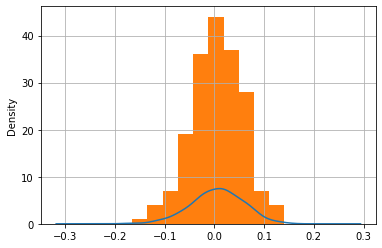

In [57]:
all_lambdas_OLS[0].iloc[:,1].plot(kind='density')
all_lambdas_OLS[0].iloc[:,1].hist()
plt.show()

## IV(Time-varying Betas)

In [58]:
holding = 21
rollingW = holding * n *12
lens = len(sim_MKT)
periods = int((lens - rollingW) / holding) - 1
print(rollingW, periods)

1260 187


In [59]:
all_betas_ev = []
all_betas_iv = []

# i is time in periods
for i in tqdm(range(periods)):

    sim_MKT_tmp = sim_MKT.iloc[i*holding:i*holding+rollingW,:]
    sim_SR_tmp = sim_SR.iloc[i*holding:i*holding+rollingW,:]
    

    if (i + 1) % 2 == 1:
        rw_odd = pd.DataFrame()
        for k in range(0,n*12,2):
            rw_odd = pd.concat([rw_odd,sim_MKT_tmp.iloc[21*k:21*(k+1),:]])

        betas_ev = []
        # j is cross-sectional stock label
        for j in sim_SR.columns:
            df_index = rw_odd.index
            b = list(ols_model.fit(sim_MKT_tmp.loc[df_index,:].values, sim_SR_tmp.loc[df_index,j].values).coef_)
            betas_ev.append(b)
        df_betas_ev = pd.DataFrame(np.array(betas_ev))
        all_betas_ev.append(df_betas_ev)
        
        rw_even = pd.DataFrame()         
        for k in range(1,n*12,2):
            rw_even = pd.concat([rw_even,sim_MKT_tmp.iloc[21*k:21*(k+1),:]])
        
        betas_iv = []
        # j is stock
        for j in sim_SR.columns:
            df_index = rw_even.index   
            b = list(ols_model.fit(sim_MKT_tmp.loc[df_index,:].values, sim_SR_tmp.loc[df_index,j].values).coef_)
            betas_iv.append(b)      
        df_betas_iv = pd.DataFrame(np.array(betas_iv))
        all_betas_iv.append(df_betas_iv)


    if (i + 1) % 2 == 0:
        rw_odd = pd.DataFrame()
        for k in range(0,n*12,2):
            rw_odd = pd.concat([rw_odd,sim_MKT_tmp.iloc[21*k:21*(k+1),:]])

        betas_iv = []
        # j is stock
        for j in sim_SR.columns:
            df_index = rw_odd.index   
            b = list(ols_model.fit(sim_MKT_tmp.loc[df_index,:].values, sim_SR_tmp.loc[df_index,j].values).coef_)
            betas_iv.append(b)        
        df_betas_iv = pd.DataFrame(np.array(betas_iv))
        all_betas_iv.append(df_betas_iv)
        
        rw_even = pd.DataFrame()   
        for k in range(1,n*12,2):
            rw_even = pd.concat([rw_even,sim_MKT_tmp.iloc[21*k:21*(k+1),:]])

        betas_ev = []
        # j is stock
        for j in sim_SR.columns:
            df_index = rw_even.index         
            b = list(ols_model.fit(sim_MKT_tmp.loc[df_index,:].values, sim_SR_tmp.loc[df_index,j].values).coef_)
            betas_ev.append(b)
        df_betas_ev = pd.DataFrame(np.array(betas_ev))
        all_betas_ev.append(df_betas_ev)

100%|██████████| 187/187 [01:57<00:00,  1.59it/s]


In [60]:
all_betas_ev[0]

,0
0,0.022987
1,0.174155
2,0.498858
3,0.040828
4,-0.079886
...,...
495,0.265191
496,0.363736
497,0.551140
498,-0.175654


In [61]:
all_betas_iv[0]

,0
0,-0.020178
1,0.228855
2,0.331515
3,0.154316
4,-0.087165
...,...
495,0.569747
496,0.403838
497,0.585748
498,-0.174752


In [62]:
## Calculating the estimated lambdas

In [63]:
holding = 1 # 1 month
rollingW = holding * n *12
lens = len(m_sim_MKT)
periods = int((lens - rollingW) / holding) - 1
print(periods, rollingW)

187 60


In [64]:
# A rule of thumb is the first stage (i.e., the regression of x on the instrument and any covariates)
# should have an F statistic of at least 10.

fvalues = []

for i in tqdm(range(len(all_betas_ev))):
    ols = sm.OLS(all_betas_ev[i].values.astype(np.float64), sm.add_constant(all_betas_iv[i].values.astype(np.float64)))
    res = ols.fit()
    f = res.fvalue
    fvalues.append(f)


100%|██████████| 187/187 [00:00<00:00, 2245.65it/s]


In [65]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1599.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          1.41e-157
Time:                        22:42:09   Log-Likelihood:                 423.33
No. Observations:                 500   AIC:                            -842.7
Df Residuals:                     498   BIC:                            -834.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0212      0.006      3.649      0.000       0.010       0.033
x1             0.8609      0.022     39.986      0.000       0.819       0.903
==============================================================================
Omnibus:                       47.925   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.218
Skew:                          -0.184   Prob(JB):                     6.88e-53
Kurtosis:                       6.376   Cond. No.                         4.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
pd.DataFrame(fvalues).describe()

,0
count,187.000000
mean,1829.404897
std,329.907676
min,1328.357624
25%,1529.883202
50%,1808.476930
75%,2141.915617
max,2486.977237


In [67]:
from linearmodels.iv.model import IV2SLS
# from linearmodels.iv.model import IVGMM
all_lambdas_IV = []
all_resids_IV = []

m_sim_SR_tmp_T = m_sim_SR.iloc[rollingW:rollingW+periods*holding,:].T

lambdas = []
resids = []
index_times = list(m_sim_SR_tmp_T.columns)

for k in tqdm(m_sim_SR_tmp_T.columns):
    
    i = int(index_times.index(k) / holding)

    iv = IV2SLS(dependent = m_sim_SR_tmp_T.loc[:,k].values,\
                exog = np.ones(len(m_sim_SR.T), dtype=np.uint8),\
                endog = all_betas_ev[i].values.astype(np.float64),\
                instruments = all_betas_iv[i].values.astype(np.float64))
    res = iv.fit()
    l = list(res.params)
    r = list(res.resids)
    lambdas.append(l)
    resids.append(r)

all_lambdas_IV.append(pd.DataFrame(lambdas))
all_resids_IV.append(pd.DataFrame(resids))

100%|██████████| 187/187 [00:00<00:00, 232.58it/s]


In [68]:
res.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:              dependent   R-squared:                      0.0532
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0513
No. Observations:                 500   F-statistic:                    23.249
Date:                Sat, Apr 09 2022   P-value (F-stat)                0.0000
Time:                        22:42:10   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
exog           0.0008     0.0061     0.1362     0.8916     -0.0111      0.0128
endog         -0.1363     0.0283    -4.8217     0.0000     -0.1917     -0.0809
==============================================================================

Endogenous: endog
Instruments: instruments
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [69]:
res.wu_hausman()

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 5.3240
P-value: 0.0214
Distributed: F(1,497)
WaldTestStatistic, id: 0x7fd1b11d21c0

In [70]:
# from statsmodels.sandbox.regression.gmm import IV2SLS

# all_lambdas_IV = []
# all_resids_IV = []
# # i is time

# m_sim_SR_tmp_T = m_sim_SR.iloc[rollingW:rollingW+periods*holding,:].T

# lambdas = []
# resids = []
# index_times = list(m_sim_SR_tmp_T.columns)

# for k in tqdm(m_sim_SR_tmp_T.columns):
    
#     i = int(index_times.index(k) / holding)
    
#     iv = IV2SLS(endog = m_sim_SR_tmp_T.loc[:,k].values,exog = sm.add_constant(all_betas_ev[i].values.astype(np.float64)),\
#                 instrument = sm.add_constant(all_betas_iv[i].values.astype(np.float64)))
# #     iv = IV2SLS(endog = m_sim_SR_tmp_T.loc[:,k].values,exog = all_betas_ev[i].values.astype(np.float64),instrument = all_betas_iv[i].values.astype(np.float))
#     res = iv.fit()
#     l = list(res.params)
#     r = list(res.resid)
#     lambdas.append(l)
#     resids.append(r)

# all_lambdas_IV.append(pd.DataFrame(lambdas))
# all_resids_IV.append(pd.DataFrame(resids))


In [71]:
# Use the IV estimator equation to calculate lambdas

In [72]:
lam = []
for i in range(periods):
    a = np.dot(np.array(all_betas_iv[i]).T,np.array(all_betas_ev[i]))
    b = np.dot(np.array(all_betas_iv[i]).T, np.array(m_sim_SR_tmp_T.iloc[:,i]))
    l = np.linalg.inv(a)*b
    lam.append(l)

In [73]:
print(np.mean(lam),stats.ttest_1samp(lam, 0.0)[0])

0.0065509487769040186 [[1.65032372]]


In [74]:
all_resids_IV = pd.DataFrame(all_resids_IV[0].T)
all_resids_IV

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.009896,-0.064975,-0.020782,0.016657,-0.018887,0.049903,-0.018251,-0.013092,0.017843,-0.002327,...,-0.012903,-0.048196,0.034863,-0.131967,-0.043566,-0.035942,-0.109821,0.053760,0.073497,0.022130
1,0.090187,-0.006104,0.003351,0.080064,0.067943,-0.095244,-0.050625,-0.001004,-0.033004,-0.051835,...,0.078710,0.058297,0.097442,0.099751,-0.147240,0.012359,0.200825,0.001010,0.004555,-0.036829
2,0.267235,-0.058847,0.051704,-0.068243,0.505989,0.030842,0.156779,-0.270264,0.171403,-0.122602,...,-0.116162,0.101886,0.189986,0.063911,0.005908,0.017168,0.061640,-0.168002,0.172142,0.036366
3,0.147371,-0.011134,0.055829,-0.024692,0.105849,-0.009738,-0.068420,0.028187,0.000153,-0.004334,...,0.024866,0.088143,-0.090650,-0.019582,-0.033011,0.055045,0.020894,0.051811,0.068499,0.082761
4,0.020551,0.009907,-0.146760,-0.000178,-0.066937,0.096789,0.015892,0.109264,-0.054070,-0.133231,...,0.067758,-0.028430,0.026250,-0.028999,0.078674,-0.008034,0.066627,0.033507,0.087954,0.002271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.110290,-0.103749,0.064745,0.041796,0.187157,0.098563,0.221589,0.112944,0.072643,0.027484,...,-0.028603,-0.191869,0.158297,-0.032180,-0.022716,0.065011,0.210632,0.194923,0.118407,-0.184295
496,0.068638,0.079316,-0.071467,-0.088595,0.027812,-0.046873,0.154932,-0.123873,0.174144,-0.010811,...,-0.077542,-0.110967,0.073516,-0.043378,-0.119560,0.031831,-0.160807,-0.057010,-0.039628,-0.141982
497,0.027998,-0.098177,-0.020920,-0.003149,-0.045498,0.034945,-0.030438,0.031256,0.003020,-0.021825,...,0.035534,0.001349,-0.046334,0.012636,-0.040086,-0.015447,-0.009040,-0.022843,0.001931,-0.023931
498,-0.010511,0.025592,0.005200,-0.012502,0.002515,0.015490,0.019092,0.012121,0.006835,0.001558,...,0.010371,0.006323,0.017328,-0.019415,0.003769,0.019188,-0.018630,-0.011063,-0.024790,-0.012461


In [75]:
# # Plot the distrubtion of the residuals
# label = all_resids_IV.index
# index = all_resids_IV.columns

# # Get the shape of df_residuals
# shape = all_resids_IV.shape

# plt.figure(figsize=(6, 4), dpi=150, tight_layout=True)

# for j in tqdm(range(shape[1])):
#     plt.plot(all_resids_IV.iloc[:,j],)  

# plt.title('The distrubtion of residuals')
# # plt.xticks(np.arange(min(label), max(label)+1, 12), fontsize = 6)
# plt.xticks([], [])
# plt.yticks(fontsize = 6)
# # plt.xlabel('Stock Labels', fontsize = 10)
# plt.ylabel('Residuals', fontsize = 10)
# plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5, axis='y')
# plt.tight_layout()
# plt.show()

In [76]:
## test whether beta_iv (instrumental variables) is exogenous
corr_iv_res = []

for i in range(np.shape(all_resids_IV)[1]):
    corr = stats.pearsonr(all_betas_iv[i].values.astype(np.float64).flatten(),all_resids_IV.iloc[:,i].values.astype(np.float64).flatten())[0]
    corr_iv_res.append(corr)

print(np.mean(corr_iv_res), "IV is Endogenous" if np.mean(corr_iv_res).round(10)!=0 else "IV is Exogenous") 

-8.921766326313872e-18 IV is Exogenous


In [77]:
## test whether beta_ev (explanatory variables) is exogenous
corr_ev_res = []

for i in range(np.shape(all_resids_IV)[1]):
    corr = stats.pearsonr(all_betas_ev[i].values.astype(np.float64).flatten(),all_resids_IV.iloc[:,i].values.astype(np.float64).flatten())[0]
    corr_ev_res.append(corr) 
    
print(np.mean(corr_ev_res), "EV is Endogenous" if np.mean(corr_ev_res).round(10)!=0 else "EV is Exogenous") 


-0.0036708507046286695 EV is Endogenous


In [78]:
## weak instrument variable test
## the following calculate the average cross-sectional correlations between odd- and even-month betas 

In [79]:
corr_ev_iv = []

for i in range(len(all_betas_ev)):
    corr = stats.pearsonr(all_betas_ev[i].values.astype(np.float64).flatten(),all_betas_iv[i].values.astype(np.float64).flatten())[0]
    corr_ev_iv.append(corr)
    
print(np.mean(corr_ev_iv), "IV is Strong" if np.mean(corr_ev_iv)>0.5 and stats.ttest_1samp(corr_ev_iv, 0.0)[0] > 2 else "IV is Weak")

0.8839824780878106 IV is Strong


In [80]:
## and also calculate the average cross-sectional correlations between estimated and true betas 

In [81]:
corr_ev_true = []

for i in range(len(all_betas_ev)):
    corr = stats.pearsonr(all_betas_ev[i].values.astype(np.float64).flatten(),sim_betas.iloc[0,:].values.astype(np.float64).flatten())[0]
    corr_ev_true.append(corr)

print(np.mean(corr_ev_true), stats.ttest_1samp(corr_ev_true, 0.0)[0])

0.9387182956590221 1520.2548282991775


In [82]:
all_lambdas_IV[0].rename(columns={0:'Intercept',1:'MKT'})

,Intercept,MKT
0,0.002833,0.080393
1,-0.005351,-0.006160
2,0.001533,-0.007491
3,0.003564,-0.018760
4,0.006600,0.131453
...,...,...
182,-0.005838,-0.011406
183,0.012220,-0.173390
184,-0.004310,-0.066940
185,0.009090,-0.037352


In [83]:
stats.ttest_1samp(all_lambdas_IV[0], 0.0)

Ttest_1sampResult(statistic=array([0.10386266, 1.58895211]), pvalue=array([0.91739024, 0.11376956]))

In [84]:
all_lambdas_IV[0].describe()

,0,1
count,187.000000,187.000000
mean,0.000046,0.006446
std,0.006011,0.055471
min,-0.014773,-0.173390
25%,-0.004322,-0.030772
50%,0.000524,0.007174
75%,0.004329,0.046457
max,0.013988,0.152175


In [93]:
print(np.mean(m_MR.values), np.mean(all_lambdas_IV[0].iloc[:,1]))

0.005930241935483869 0.006445527963131384


In [85]:
print("ex-ante bias(%): " + str((np.mean(all_lambdas_IV[0].iloc[:,1]) - np.mean(m_MR.values))/(np.mean(m_MR.values))*100))
print("ex-post bias(%): " + str((np.mean(all_lambdas_IV[0].iloc[:,1]) - np.mean(m_sim_MKT.values))/np.mean(m_sim_MKT.values)*100))   

ex-ante bias(%): 8.689123196884726
ex-post bias(%): 26.29405532622887


In [86]:
## The Ex-ante RMSE
diff = all_lambdas_IV[0].iloc[:,1]-np.array(m_MR_tmp).flatten()
np.sqrt((diff**2).mean())

0.07640827571830422

In [87]:
## The Ex-post RMSE
diff = all_lambdas_IV[0].iloc[:,1]-np.array(m_sim_MKT_tmp).flatten()
np.sqrt((diff**2).mean())

0.07635795562921101

### OLS with beta_ev

In [88]:
from linearmodels.iv.model import IV2SLS

all_lambdas_ols = []
all_resids_ols = []

m_sim_SR_tmp_T = m_sim_SR.iloc[rollingW:rollingW+periods*holding,:].T

lambdas = []
resids = []
index_times = list(m_sim_SR_tmp_T.columns)

for k in tqdm(m_sim_SR_tmp_T.columns):
    
    i = int(index_times.index(k) / holding)

    ols = IV2SLS(dependent = m_sim_SR_tmp_T.loc[:,k].values,\
                exog = pd.concat([pd.DataFrame(np.ones(len(m_sim_SR.T), dtype=np.uint8)).T, all_betas_ev[i].T], axis =0,ignore_index=True).T,\
                endog = None,\
                instruments = None)
    res = ols.fit()
    l = list(res.params)
    r = list(res.resids)
    lambdas.append(l)
    resids.append(r)

all_lambdas_ols.append(pd.DataFrame(lambdas))
all_resids_ols.append(pd.DataFrame(resids))

100%|██████████| 187/187 [00:00<00:00, 188.26it/s]


In [89]:
all_resids_ols = pd.DataFrame(all_resids_ols[0].T)
all_resids_ols

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.009535,-0.066934,-0.022838,0.013799,-0.022261,0.046931,-0.022521,-0.012825,0.019521,-0.002373,...,-0.012733,-0.045058,0.036632,-0.132909,-0.048996,-0.036711,-0.108064,0.052787,0.074222,0.025142
1,0.090224,-0.005617,0.003862,0.080874,0.068899,-0.094712,-0.049860,-0.001078,-0.033464,-0.051822,...,0.078664,0.057441,0.097256,0.099850,-0.145960,0.012540,0.200544,0.001166,0.004432,-0.037339
2,0.268128,-0.053792,0.057008,-0.060770,0.514809,0.038898,0.168352,-0.271014,0.166696,-0.122501,...,-0.116684,0.092226,0.183133,0.067561,0.026990,0.020157,0.056089,-0.164929,0.169517,0.025450
3,0.147057,-0.012659,0.054228,-0.026648,0.103541,-0.011450,-0.070879,0.028346,0.001148,-0.004356,...,0.024927,0.089272,-0.090103,-0.019873,-0.034437,0.054842,0.021072,0.051712,0.068473,0.082655
4,0.019920,0.006556,-0.150276,-0.004617,-0.072177,0.091923,0.008901,0.109726,-0.051172,-0.133302,...,0.068191,-0.020419,0.030930,-0.031491,0.065140,-0.009953,0.070433,0.031401,0.089866,0.010218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.110012,-0.102307,0.066258,0.043807,0.189532,0.101241,0.225436,0.112697,0.071096,0.027512,...,-0.028709,-0.193817,0.156752,-0.031357,-0.017701,0.065722,0.210273,0.195122,0.118463,-0.184061
496,0.069175,0.082437,-0.068192,-0.084296,0.032887,-0.042605,0.161064,-0.124313,0.171381,-0.010752,...,-0.077990,-0.119259,0.068529,-0.040722,-0.103230,0.034146,-0.165111,-0.054627,-0.041630,-0.150306
497,0.029029,-0.092106,-0.014550,0.005103,-0.035758,0.043438,-0.018237,0.030446,-0.002068,-0.021709,...,0.034910,-0.010200,-0.052963,0.016167,-0.021375,-0.012795,-0.014251,-0.019959,-0.000468,-0.033909
498,-0.011395,0.020398,-0.000250,-0.019500,-0.005745,0.008311,0.008778,0.012798,0.011081,0.001461,...,0.010892,0.015961,0.022874,-0.022369,-0.011933,0.016962,-0.014318,-0.013450,-0.022755,-0.003999


In [90]:
all_lambdas_ols[0].rename(columns = {0:'Intercepts', 1:'MKT'})

,Intercepts,MKT
0,0.003254,0.077758
1,-0.002889,-0.021601
2,0.004118,-0.023693
3,0.006892,-0.039623
4,0.010529,0.106827
...,...,...
182,-0.004746,-0.018221
183,0.010079,-0.159971
184,-0.003125,-0.074370
185,0.008088,-0.031109


In [91]:
corr_betas_ev_res = []

for i in range(np.shape(all_resids_ols)[1]):
    corr = stats.pearsonr(all_betas_ev[i].values.astype(np.float64).flatten(),all_resids_ols.iloc[:,i].values.astype(np.float64).flatten())[0]
    corr_betas_ev_res.append(corr)
    
# expression_if_true if condition else expression_if_false
print(np.mean(corr_betas_ev_res), "EV is Endogenous" if np.mean(corr_betas_ev_res).round(10)!=0 else "EV is Exogenous")


1.9399681653136354e-18 EV is Exogenous


In [92]:
print("ex-ante bias(%): " + str((np.mean(all_lambdas_ols[0].iloc[:,1]) - np.mean(m_MR_tmp.values))/(np.mean(m_MR.values))*100))
print("ex-post bias(%): " + str((np.mean(all_lambdas_ols[0].iloc[:,1]) - np.mean(m_sim_MKT_tmp.values))/np.mean(m_sim_MKT.values)*100))   
## The result is almost the same as the OLS section

ex-ante bias(%): -28.74994314956344
ex-post bias(%): -42.52039307218559
